# **Hotel Booking Final Project Machine Learning**

**Created by:** M Hassya S

### **Dataset Overview:**
The dataset `hotel_bookings.csv` contains comprehensive information about hotel booking records, showcasing various aspects of customer bookings for hotels. It encompasses data points such as booking status, customer details, stay duration, and financial aspects.

### **Context:**
An OTA has a historical dataset of hotel bookings of its lodging partners which has been compiled in an effort to increase ADR through fulfilling bookings whenever available. The OTA has initiated a project to aid lodging partners in determining whether a certain booking has a high probability of being canceled, which enables the lodging partners to open up the possibility of a double booking in order to avoid potential profit loss.

### **Problem Statement Machine Learning:**
- **Stakeholder:** OTA (Online Travel Agency)
- **Problem:** How can OTA aid in identifying which bookings have a high probability of being cancelled?
- **Reasoning:** High cancellation rates lead to reduced potential profits for lodging partners.
- **Goal:** To identify which bookings have a high probability of cancellation, so that lodging partners can open a double booking an accommodation to avoid loss.
- **Benefit of analysis:** OTA and its lodging partners can more effectively strategize pricing for their accommodations which could lead to more budget-friendly average daily rates and less cancellation.
- **Expected outcome:**
  - Classify and predict which bookings have a chance of high or low cancellation rate to allow for possible double bookings.
  - Classification:
    - **HIGH cancellation rate** => allow opportunity for double booking.
    - **LOW cancellation rate** => disallow opportunity for double booking.

### **Hypothetical Profit Loss Analysis Case Study:**
- **Scenario:** A mid-scale hotel "OceanView Hotel" with 100 rooms experiences a 20% cancellation rate on bookings, with most guests booking for an average stay of 3 nights.
- **Assumptions:**
  - Average Daily Rate (ADR): $150 per night.
  - Upscale Hotel Rate for last-minute bookings: Up to $300 per night.
  - Booking in Advance Rate: $209 per night.
- **Analysis:**
  - **Without Double Booking Strategy:** Potential loss of $125,400 per month from cancellations.
  - **With Double Booking Strategy:** A net potential gain of $210,600 per month, even after compensating for the risks of double booking.

### **Metric Evaluation:**
#### Definitions
- **True Positives (TP):** Correct predictions of cancellations.
- **True Negatives (TN):** Correct predictions of non-cancellations.
- **False Positives (FP):** Incorrect predictions of cancellations.
- **False Negatives (FN):** Incorrect predictions of non-cancellations.

#### Metrics Defined
- **Precision:** The accuracy of predicting cancellations.
- **Recall:** The ability to identify all actual cancellations.
- **F1 Score:** A balance between precision and recall.

#### Business Relevance
- **Precision:** Reduces costs by avoiding unnecessary preparations for bookings.
- **Recall:** Protects revenue by identifying likely cancellations.
- **F1 Score:** Balances precision and recall for model efficiency.

#### Prioritization
The focus on precision or recall depends on the business impact of false predictions. The F1 Score is considered for overall balance.

### **Project Limitation:**
- Inaccurate predictions due to unforeseen circumstances or missing data.
- Implementing a double booking strategy, as shown in the profit loss analysis case study, could substantially mitigate losses due to cancellations. However, the strategy requires careful consideration of operational and reputational costs.


In [118]:
# Import Module
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import numpy as np
import pycaret
from sklearn.model_selection import StratifiedKFold,train_test_split

## **Load Dataset**

In [119]:
# Load the dataset
data = pd.read_csv('cleaned_ml_hotelbookings.csv')

## **Split Data**

In [120]:
# Split the data into training and unseen sets
seen, unseen = train_test_split(data, test_size=0.3, random_state=42, stratify=data['is_canceled'])


Split dataset into seen and unseen. Where seen will be used to train the model and unseen will be used to test the performance of the model trained.

In [121]:
# Display seen data
seen

,is_canceled,country,market_segment,deposit_type,total_of_special_requests,reservation_status_month,arrival_date_month,lead_time
74232,0,43,5,0,0,1,2,278
6106,1,135,3,0,2,9,11,29
9695,1,135,6,0,0,4,5,108
19135,0,59,6,0,1,5,0,31
29017,0,76,3,0,1,4,7,150
...,...,...,...,...,...,...,...,...
81323,0,59,6,0,3,5,8,114
84063,0,51,6,0,0,7,5,250
52445,1,15,6,0,1,1,1,242
61176,0,54,6,0,1,4,0,92


'seen' dataset split has the following detail:
- 61,059 rows
- 8 columns

In [122]:
#Display unseen data
unseen

,is_canceled,country,market_segment,deposit_type,total_of_special_requests,reservation_status_month,arrival_date_month,lead_time
6438,1,59,6,0,1,9,10,65
66305,0,154,6,0,1,8,5,157
45375,1,51,6,0,1,11,2,27
34133,1,135,6,0,1,4,5,98
52629,1,169,6,0,0,5,1,168
...,...,...,...,...,...,...,...,...
58884,0,126,6,0,1,3,7,21
45671,1,174,6,0,1,12,2,21
14232,0,25,6,0,1,11,9,65
21628,0,135,3,0,0,7,5,4


'unseen' dataset split has the following detail:
- 26,169 rows
- 8 columns

## **Setup Environment for Preliminary Benchmarking** 

In [123]:
# import pycaret classification and benchmark setup
from pycaret.classification import *
benchmark = setup (seen, target = 'is_canceled', session_id = 123, preprocess= True, normalize = True, normalize_method = 'robust', 
          remove_outliers= True, outliers_threshold=0.05)


,Description,Value
0,Session id,123
1,Target,is_canceled
2,Target type,Binary
3,Original data shape,"(61059, 8)"
4,Transformed data shape,"(58922, 8)"
5,Transformed train set shape,"(40604, 8)"
6,Transformed test set shape,"(18318, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


Environment setup for preliminary benchmarking and modeling, with the following detail:
- Preprocess on True
- Normalization of values using Robust Scaler
- Removing outliers at 0.05 threshold for upper and lower bound 

## **Compare Models**

In [124]:
# benchmark baseline models
prelim_benchmark = benchmark.compare_models(n_select= 3, sort='F1')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:59:13
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9147,0.9342,0.7014,0.9842,0.8190,0.7653,0.7841,1.9690
et,Extra Trees Classifier,0.8947,0.8863,0.7482,0.8514,0.7964,0.7258,0.7286,3.0130
rf,Random Forest Classifier,0.8953,0.9098,0.7430,0.8577,0.7961,0.7262,0.7297,2.9480
dt,Decision Tree Classifier,0.8721,0.8398,0.7390,0.7843,0.7609,0.6737,0.6743,1.5470
knn,K Neighbors Classifier,0.8692,0.8690,0.6294,0.8573,0.7259,0.6426,0.6558,1.7580
gbc,Gradient Boosting Classifier,0.8639,0.8939,0.5732,0.8945,0.6985,0.6160,0.6416,2.6050
ada,Ada Boost Classifier,0.7823,0.8095,0.3819,0.6883,0.4911,0.3668,0.3926,1.9110
lda,Linear Discriminant Analysis,0.7580,0.7222,0.2158,0.6941,0.3291,0.2285,0.2869,1.5750
lr,Logistic Regression,0.7564,0.7259,0.2152,0.6832,0.3271,0.2249,0.2812,2.9870
ridge,Ridge Classifier,0.7527,0.0000,0.1565,0.7407,0.2582,0.1795,0.2587,1.3820


**Focusing on top 3 models from preliminary benchmark**

| Model                        | Accuracy | AUC    | Recall | Precision | F1    | Kappa | MCC    | TT (Sec) |
|------------------------------|----------|--------|--------|-----------|-------|-------|--------|----------|
| Light Gradient Boosting (LGBM)| 0.9147   | 0.9342 | 0.7014 | 0.9842    | 0.8190| 0.7653| 0.7841 | 1.9690   |
| Extra Trees Classifier (ET)  | 0.8947   | 0.8863 | 0.7482 | 0.8514    | 0.7964| 0.7258| 0.7286 | 3.0130   |
| Random Forest Classifier (RF)| 0.8953   | 0.9098 | 0.7430 | 0.8577    | 0.7961| 0.7262| 0.7297 | 2.9480   |

Interpretation for each model's F1 Score, Precision, and Recall:

1. **Light Gradient Boosting (LGBM):**
   - F1 Score: 0.8190
   - Precision: 0.9842
   - Recall: 0.7014

   Light Gradient Boosting (LGBM) achieved a high precision of 0.9842, indicating that it makes very few false positive predictions. However, its recall of 0.7014 suggests that it may miss some positive cases. The F1 Score, which balances precision and recall, is 0.8190, indicating a good balance between these two metrics.

2. **Extra Trees Classifier (ET):**
   - F1 Score: 0.7964
   - Precision: 0.8514
   - Recall: 0.7482

   The Extra Trees Classifier (ET) has a moderate F1 Score of 0.7964, with relatively balanced precision and recall. It has a precision of 0.8514, indicating a good ability to identify true positives, but its recall of 0.7482 suggests that it may miss some positive cases.

3. **Random Forest Classifier (RF):**
   - F1 Score: 0.7961
   - Precision: 0.8577
   - Recall: 0.7430

   The Random Forest Classifier (RF) has similar performance to the Extra Trees Classifier. It has an F1 Score of 0.7961, a precision of 0.8577, and a recall of 0.7430. Like ET, RF achieves a balance between precision and recall but may still miss some positive cases.

In summary, LGBM achieved the highest precision, but it sacrifices some recall, resulting in an F1 Score of 0.8190. Both ET and RF have similar F1 Scores, with a balance between precision and recall, indicating that they are suitable for tasks where achieving a good balance between false positives and false negatives is important. 

In [127]:
# Display top 3 models
prelim_benchmark

[LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
                subsample_for_bin=200000, subsample_freq=0),
 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='sqrt',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False),
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, cl

## **Create Model & Benchmark Raw Model**

In [128]:
# check all the available models in pycaret
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [130]:
# train lightgbm, extra trees and random forest with default fold=10
prelim_lightgbm = benchmark.create_model('lightgbm')
prelim_et = benchmark.create_model('et')
prelim_rf = benchmark.create_model('rf')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9099,0.9346,0.6873,0.9794,0.8078,0.7513,0.7714
1,0.9076,0.9312,0.6786,0.9791,0.8016,0.7439,0.7652
2,0.9153,0.9319,0.7024,0.9857,0.8203,0.7669,0.7857
3,0.9134,0.9348,0.6981,0.9821,0.8161,0.7616,0.7806
4,0.9123,0.9359,0.6939,0.9819,0.8132,0.7580,0.7775
5,0.9176,0.9342,0.7117,0.9847,0.8263,0.7741,0.7916
6,0.9141,0.9391,0.6973,0.9868,0.8171,0.7632,0.7828
7,0.9202,0.9349,0.7205,0.9860,0.8326,0.7819,0.7985
8,0.9209,0.9360,0.7230,0.9861,0.8343,0.7840,0.8003


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8856,0.8775,0.7417,0.8251,0.7812,0.7041,0.7059
1,0.8900,0.8771,0.7313,0.8481,0.7854,0.7120,0.7155
2,0.8959,0.8792,0.7568,0.8484,0.8000,0.7299,0.7321
3,0.8968,0.8900,0.7415,0.8642,0.7982,0.7294,0.7333
4,0.8987,0.8995,0.7602,0.8555,0.8050,0.7369,0.7393
5,0.8940,0.8926,0.7457,0.8506,0.7947,0.7237,0.7266
6,0.8968,0.8806,0.7372,0.8679,0.7972,0.7287,0.7330
7,0.9003,0.8938,0.7689,0.8546,0.8095,0.7422,0.7441
8,0.8982,0.8879,0.7502,0.8623,0.8024,0.7343,0.7375


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8877,0.9069,0.7298,0.8413,0.7816,0.7066,0.7098
1,0.8905,0.9075,0.7194,0.8598,0.7833,0.7108,0.7159
2,0.8987,0.9037,0.7585,0.8569,0.8047,0.7366,0.7391
3,0.8968,0.9101,0.7355,0.8693,0.7969,0.7284,0.7329
4,0.8975,0.9184,0.7483,0.8611,0.8007,0.7322,0.7355
5,0.8954,0.9154,0.7509,0.8515,0.7980,0.7278,0.7304
6,0.8973,0.9061,0.7287,0.8772,0.7961,0.7282,0.7338
7,0.8975,0.9110,0.7664,0.8469,0.8046,0.7354,0.7371
8,0.8975,0.9093,0.7494,0.8605,0.8011,0.7325,0.7357


In [131]:
# train lightgbm, extra trees and random forest with default fold=10 and return train score as well alongwith CV
prelim_lightgbm = benchmark.create_model('lightgbm', return_train_score=True)
prelim_et = benchmark.create_model('et', return_train_score=True)
prelim_rf = benchmark.create_model('rf', return_train_score=True)


**Top 3 Preliminary Benchmark Cross Validation Results**
| Model             | Metric | CV-Train Mean | CV-Train Std | CV-Val Mean | CV-Val Std |
|-------------------|--------|---------------|--------------|-------------|------------|
| prelim_lightgbm   | F1     | 0.8244        | 0.0009       | 0.8190      | 0.0098     |
|                   | Precision | 0.9898    | 0.0013       | 0.9842      | 0.0034     |
|                   | Recall  | 0.7063        | 0.0014       | 0.7014      | 0.0132     |
| prelim_et         | F1     | 0.7964        | 0.0083       | 0.7961      | 0.0076     |
|                   | Precision | 0.9902    | 0.0011       | 0.8514      | 0.0122     |
|                   | Recall  | 0.9007        | 0.0015       | 0.7482      | 0.0107     |
| prelim_rf         | F1     | 0.7961        | 0.0095       | 0.7957      | 0.0076     |
|                   | Precision | 0.9809    | 0.0006       | 0.8577      | 0.0099     |
|                   | Recall  | 0.9105        | 0.0013       | 0.7430      | 0.0138     |

Interpretation of CV-Train compared to CV-Val results for each model focusing on F1, Precision, and Recall:

1. **prelim_lightgbm:**
   - F1 Score: The CV-Train F1 Score (0.8244) is slightly higher than the CV-Val F1 Score (0.8190), indicating that the model may be slightly overfitting, but the difference is relatively small.
   - Precision: The CV-Train Precision (0.9898) is slightly higher than the CV-Val Precision (0.9842), also suggesting a minor degree of overfitting.
   - Recall: The CV-Train Recall (0.7063) is slightly higher than the CV-Val Recall (0.7014), indicating a small overfitting tendency.

2. **prelim_et:**
   - F1 Score: The CV-Train F1 Score (0.7964) and CV-Val F1 Score (0.7961) are quite close, suggesting a good balance between training and validation performance.
   - Precision: The CV-Train Precision (0.9902) is higher than the CV-Val Precision (0.8514), indicating potential overfitting in terms of Precision.
   - Recall: The CV-Train Recall (0.9007) is higher than the CV-Val Recall (0.7482), suggesting a possible overfitting tendency in Recall.

3. **prelim_rf:**
   - F1 Score: The CV-Train F1 Score (0.7961) and CV-Val F1 Score (0.7957) are very close, indicating a balanced performance between training and validation.
   - Precision: The CV-Train Precision (0.9809) is higher than the CV-Val Precision (0.8577), suggesting potential overfitting in Precision.
   - Recall: The CV-Train Recall (0.9105) is higher than the CV-Val Recall (0.7430), indicating a possible overfitting tendency in Recall.

In summary, all three models (prelim_lightgbm, prelim_et, prelim_rf) exhibit relatively consistent F1 Scores between CV-Train and CV-Val, but there is a noticeable difference in Precision and Recall. This difference suggests that the models may have some degree of overfitting, especially in terms of Precision, as the training data seems to achieve higher Precision values compared to the validation data.

## **Experiment Model using SMOTE**

In [132]:
from pycaret.classification import ClassificationExperiment
from pycaret.internal.preprocess.transformers import TransformerWrapper, FixImbalancer

# Initialize experiment setup for the SMOTE experiment
penalize = ClassificationExperiment()
penalize.setup (seen, target = 'is_canceled', session_id = 123, preprocess= True, normalize = True, normalize_method = 'robust', 
          remove_outliers= True, outliers_threshold=0.05, fix_imbalance= True, fix_imbalance_method= 'smote')


,Description,Value
0,Session id,123
1,Target,is_canceled
2,Target type,Binary
3,Original data shape,"(61059, 8)"
4,Transformed data shape,"(77716, 8)"
5,Transformed train set shape,"(59398, 8)"
6,Transformed test set shape,"(18318, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


Setting up environment for model experiment using preprocessing methodologies from benchmarking with additional fix imbalance method using SMOTE.

**Reason for using SMOTE:**

Class imbalance is a common challenge in machine learning, where one class significantly outnumbers the other(s) in a dataset. In the "is_canceled" dataset, we have a binary classification problem where "is_canceled" can be either 0 (not canceled) or 1 (canceled). Class imbalance occurs when there's a substantial difference in the number of instances between these two classes.

Using Synthetic Minority Over-sampling Technique (SMOTE) is a recommended approach to address this class imbalance for several compelling reasons:

1. **Enhanced Model Generalization:** In imbalanced datasets, machine learning models tend to favor the majority class and perform poorly on the minority class. By using SMOTE, we can balance the class distribution by generating synthetic examples of the minority class. This allows the model to learn the minority class patterns more effectively and generalize better to unseen data.

2. **Improved Model Performance:** SMOTE helps improve key performance metrics such as Recall, Precision, and F1 Score. In the context of predicting cancellations, improving Recall is particularly important because it ensures that the model correctly identifies as many canceled bookings as possible, reducing the risk of missed revenue opportunities or customer dissatisfaction.

3. **Reduced Bias:** Without addressing class imbalance, models may predict that bookings are rarely canceled simply because the majority of instances fall into that category. This bias can lead to inaccurate predictions and decision-making. SMOTE mitigates this bias by creating a more balanced dataset, allowing the model to treat both classes fairly.

4. **Realistic Representation:** SMOTE generates synthetic samples by interpolating between existing minority class samples, ensuring that the synthetic instances closely resemble actual data. This approach maintains the realism of the dataset while addressing class imbalance.

5. **Preservation of Information:** By creating synthetic samples, SMOTE retains the valuable information present in the minority class. It doesn't simply oversample existing data points but rather augments the dataset intelligently.

In summary, using SMOTE to address class imbalance in the "is_canceled" dataset is crucial for enhancing model performance, improving generalization, and ensuring fair and accurate predictions.

In [133]:
#Compare penalized models
penalize_model = penalize.compare_models(n_select=3, sort='F1')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,21:27:20
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9157,0.9338,0.7217,0.9628,0.8249,0.7709,0.7848,1.8810
et,Extra Trees Classifier,0.8935,0.8855,0.7543,0.8426,0.7959,0.7242,0.7263,3.9260
rf,Random Forest Classifier,0.8921,0.9071,0.7448,0.8451,0.7917,0.7193,0.7220,4.4570
dt,Decision Tree Classifier,0.8676,0.8357,0.7343,0.7733,0.7532,0.6628,0.6633,1.5750
knn,K Neighbors Classifier,0.8621,0.8704,0.6991,0.7775,0.7362,0.6432,0.6449,1.7070
gbc,Gradient Boosting Classifier,0.8290,0.8828,0.7095,0.6824,0.6956,0.5768,0.5771,4.7720
ada,Ada Boost Classifier,0.7624,0.7993,0.6397,0.5599,0.5971,0.4297,0.4317,2.4960
lr,Logistic Regression,0.6566,0.7266,0.6938,0.4244,0.5266,0.2810,0.3019,2.2920
ridge,Ridge Classifier,0.6523,0.0000,0.6968,0.4206,0.5245,0.2760,0.2980,1.5040
lda,Linear Discriminant Analysis,0.6520,0.7248,0.6957,0.4202,0.5239,0.2752,0.2970,1.6160


**Focusing on top 3 models after using SMOTE**
| Model                        | Accuracy | AUC    | Recall | Precision | F1    | Kappa | MCC    | TT (Sec) |
|------------------------------|----------|--------|--------|-----------|-------|-------|--------|----------|
| Light Gradient Boosting (LGBM)| 0.9157   | 0.9338 | 0.7217 | 0.9628    | 0.8249| 0.7709| 0.7848 | 1.8810   |
| Extra Trees Classifier (ET)  | 0.8935   | 0.8855 | 0.7543 | 0.8426    | 0.7959| 0.7242| 0.7263 | 3.9260   |
| Random Forest Classifier (RF)| 0.8921   | 0.9071 | 0.7448 | 0.8451    | 0.7917| 0.7193| 0.7220 | 4.4570   |

Interpretation for each model's F1 Score, Precision, and Recall:

1. **Light Gradient Boosting (LGBM):**
   - F1 Score: 0.8249
   - Precision: 0.9628
   - Recall: 0.7217

   Light Gradient Boosting (LGBM) achieved a high precision of 0.9628, indicating that it makes very few false positive predictions. Its recall of 0.7217 suggests that it may miss some positive cases, but the F1 Score, which balances precision and recall, is 0.8249, indicating a good balance between these two metrics.

2. **Extra Trees Classifier (ET):**
   - F1 Score: 0.7959
   - Precision: 0.8426
   - Recall: 0.7543

   The Extra Trees Classifier (ET) has a moderate F1 Score of 0.7959, with a relatively balanced precision and recall. It has a precision of 0.8426, indicating a good ability to identify true positives, and a recall of 0.7543.

3. **Random Forest Classifier (RF):**
   - F1 Score: 0.7917
   - Precision: 0.8451
   - Recall: 0.7448

The Random Forest Classifier (RF) has similar performance to the Extra Trees Classifier. It has an F1 Score of 0.7917, a precision of 0.8451, and a recall of 0.7448. Like ET, RF achieves a balance between precision and recall.

In summary, LGBM achieved the highest precision but may miss some positive cases (lower recall). Both ET and RF have similar F1 Scores, with a balance between precision and recall, indicating that they are suitable for tasks where achieving a good balance between false positives and false negatives is important.

In [134]:
#Display top 3 penalize models
penalize_model

[LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
                subsample_for_bin=200000, subsample_freq=0),
 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='sqrt',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False),
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, cl

In [135]:
# train penalized lightgbm, extra trees and random forest with default fold=10
pen_lightgbm = penalize.create_model('lightgbm')
pen_et = penalize.create_model('et')
pen_rf = penalize.create_model('rf')


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,21:38:32
Status,. . . . . . . . . . . . . . . . . .,Selecting Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9097,0.9336,0.7060,0.9541,0.8115,0.7539,0.7687
1,0.9102,0.9327,0.7117,0.9490,0.8134,0.7558,0.7694
2,0.9181,0.9298,0.7245,0.9704,0.8296,0.7772,0.7916
3,0.9174,0.9369,0.7185,0.9746,0.8272,0.7746,0.7901
4,0.9179,0.9363,0.7202,0.9747,0.8284,0.7760,0.7913
5,0.9144,0.9311,0.7262,0.9510,0.8235,0.7683,0.7805
6,0.9188,0.9414,0.7262,0.9716,0.8311,0.7792,0.7935
7,0.9202,0.9354,0.7366,0.9655,0.8357,0.7842,0.7967
8,0.9174,0.9359,0.7332,0.9568,0.8302,0.7769,0.7889


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8856,0.8780,0.7519,0.8179,0.7835,0.7060,0.7071
1,0.8912,0.8766,0.7398,0.8455,0.7891,0.7162,0.7191
2,0.8945,0.8786,0.7636,0.8385,0.7993,0.7279,0.7294
3,0.8980,0.8872,0.7449,0.8656,0.8007,0.7327,0.7364
4,0.8959,0.8982,0.7687,0.8394,0.8025,0.7320,0.7333
5,0.8933,0.8901,0.7543,0.8416,0.7955,0.7236,0.7256
6,0.8940,0.8827,0.7406,0.8548,0.7936,0.7228,0.7262
7,0.8999,0.8924,0.7766,0.8471,0.8103,0.7424,0.7437
8,0.8966,0.8864,0.7536,0.8537,0.8005,0.7311,0.7337


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8847,0.9021,0.7341,0.8276,0.7780,0.7005,0.7028
1,0.8858,0.9071,0.7168,0.8447,0.7755,0.6997,0.7039
2,0.8945,0.8992,0.7568,0.8436,0.7978,0.7267,0.7287
3,0.8961,0.9088,0.7415,0.8617,0.7971,0.7278,0.7315
4,0.8959,0.9161,0.7577,0.8478,0.8002,0.7301,0.7322
5,0.8926,0.9110,0.7526,0.8405,0.7941,0.7217,0.7238
6,0.8933,0.9053,0.7296,0.8614,0.7901,0.7192,0.7237
7,0.8961,0.9074,0.7621,0.8454,0.8016,0.7315,0.7333
8,0.8956,0.9059,0.7545,0.8498,0.7993,0.7291,0.7315


In [136]:
# train penalized lightgbm, extra trees and random forest with default fold=10 and return train score as well alongwith CV
pen_lightgbm = penalize.create_model('lightgbm', return_train_score=True)
pen_et = penalize.create_model('et', return_train_score=True)
pen_rf = penalize.create_model('rf', return_train_score=True)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,21:42:14
Status,. . . . . . . . . . . . . . . . . .,Selecting Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


| Model              | Metric    | CV-Train Mean | CV-Train Std | CV-Val Mean | CV-Val Std |
|--------------------|-----------|--------------|--------------|-------------|------------|
| pen_lightgbm       | F1        | 0.8311       | 0.0030       | 0.8249      | 0.0076     |
|                    | Precision | 0.9671       | 0.0032       | 0.9628      | 0.0093     |
|                    | Recall    | 0.7287       | 0.0041       | 0.7217      | 0.0091     |
| pen_et             | F1        | 0.7959       | 0.0081       | 0.7959      | 0.0081     |
|                    | Precision | 0.9855       | 0.0016       | 0.8426      | 0.0138     |
|                    | Recall    | 0.9048       | 0.0016       | 0.7543      | 0.0114     |
| pen_rf             | F1        | 0.7917       | 0.0091       | 0.7917      | 0.0091     |
|                    | Precision | 0.9735       | 0.0008       | 0.8451      | 0.0109     |
|                    | Recall    | 0.9156       | 0.0013       | 0.7448      | 0.0138     |

Interpretation of CV-Train compared to CV-Val results for each model focusing on F1 Score, Precision, and Recall:

1. **pen_lightgbm:**
   - F1 Score: The CV-Train F1 Score (0.8311) is slightly higher than the CV-Val F1 Score (0.8249), indicating that the model may be slightly overfitting, but the difference is relatively small.
   - Precision: The CV-Train Precision (0.9671) is slightly higher than the CV-Val Precision (0.9628), suggesting a minor degree of overfitting.
   - Recall: The CV-Train Recall (0.7287) is slightly higher than the CV-Val Recall (0.7217), indicating a small overfitting tendency.

2. **pen_et:**
   - F1 Score: The CV-Train F1 Score (0.7959) and CV-Val F1 Score (0.7959) are identical, suggesting a balanced performance between training and validation.
   - Precision: The CV-Train Precision (0.9855) is higher than the CV-Val Precision (0.8426), indicating potential overfitting in terms of Precision.
   - Recall: The CV-Train Recall (0.9048) is higher than the CV-Val Recall (0.7543), suggesting a possible overfitting tendency in Recall.

3. **pen_rf:**
   - F1 Score: The CV-Train F1 Score (0.7917) and CV-Val F1 Score (0.7917) are identical, indicating a balanced performance between training and validation.
   - Precision: The CV-Train Precision (0.9735) is higher than the CV-Val Precision (0.8451), suggesting potential overfitting in terms of Precision.
   - Recall: The CV-Train Recall (0.9156) is higher than the CV-Val Recall (0.7448), indicating a possible overfitting tendency in Recall.

In summary, the models "pen_lightgbm," "pen_et," and "pen_rf" show varying degrees of overfitting tendencies in Precision and Recall when comparing CV-Train to CV-Val results. While some models have similar F1 Scores between CV-Train and CV-Val, the discrepancies in Precision and Recall suggest the need for further model tuning or regularization to improve generalization and reduce overfitting.

## **Experiment Model using ADASYN**

In [137]:
from pycaret.classification import ClassificationExperiment
from pycaret.internal.preprocess.transformers import TransformerWrapper, FixImbalancer

# Initialize experiment setup for ADASYN experiment
adasyn = ClassificationExperiment()
adasyn.setup(seen, target = 'is_canceled', session_id = 123, preprocess= True, normalize = True, normalize_method = 'robust', 
          remove_outliers= True, outliers_threshold=0.05,  fix_imbalance=True, fix_imbalance_method='adasyn')

,Description,Value
0,Session id,123
1,Target,is_canceled
2,Target type,Binary
3,Original data shape,"(61059, 8)"
4,Transformed data shape,"(78605, 8)"
5,Transformed train set shape,"(60287, 8)"
6,Transformed test set shape,"(18318, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


Setting up environment for model experiment using preprocessing methodologies from benchmarking with additional fix imbalance method using SMOTE.

Certainly, here's a reason to use ADASYN (Adaptive Synthetic Sampling) to fix class imbalance in the "is_canceled" dataset in Markdown format:

**Reason to Use ADASYN for Class Imbalance in "is_canceled" Dataset:**

Class imbalance is a common issue in machine learning, where one class significantly outnumbers the other(s) in a dataset. In the "is_canceled" dataset, we have a binary classification problem where "is_canceled" can be either 0 (not canceled) or 1 (canceled). Class imbalance occurs when there's a substantial difference in the number of instances between these two classes.

Using the ADASYN algorithm is a compelling approach to address this class imbalance, and these are the following reasons:

1. **Adaptive Sampling:** ADASYN is specifically designed to adaptively generate synthetic samples for the minority class. It focuses on areas of the feature space where the minority class is underrepresented, effectively identifying and addressing the "hard-to-learn" instances. This adaptiveness ensures that synthetic samples are generated where they are most needed.

2. **Balanced Data Distribution:** ADASYN aims to balance the class distribution in a way that doesn't just blindly oversample the minority class but does so intelligently. It generates synthetic examples that are close to the existing minority class instances, maintaining the distribution's realism while addressing the imbalance.

3. **Improved Model Generalization:** By creating synthetic samples for the minority class, ADASYN helps machine learning models better capture the underlying patterns of the minority class. This leads to improved model generalization, reducing the risk of overfitting on the majority class and increasing the model's ability to make accurate predictions on unseen data.

4. **Enhanced Metrics:** ADASYN often results in improved performance metrics such as Recall, Precision, F1 Score, and AUC. In a classification task like predicting cancellations, increasing Recall is particularly crucial as it ensures that the model correctly identifies more canceled bookings, reducing potential revenue loss and customer dissatisfaction.

5. **Reduced Bias:** Without addressing class imbalance, models may predict that bookings are rarely canceled simply because the majority of instances fall into that category. ADASYN mitigates this bias by creating a more balanced dataset, enabling the model to treat both classes fairly and make more informed predictions.

In summary, using ADASYN to address class imbalance in the "is_canceled" dataset is a valuable strategy for improving model performance, enhancing generalization, and ensuring accurate predictions. ADASYN's adaptive nature and focus on "hard-to-learn" instances make it an effective technique for tackling class imbalance challenges and building robust machine learning models for this classification task.

In [138]:
#Compare ADASYN models
adasyn_model = adasyn.compare_models(n_select=3, sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9165,0.9335,0.7198,0.9686,0.8258,0.7724,0.7872,2.2330
et,Extra Trees Classifier,0.8922,0.8848,0.7542,0.8380,0.7938,0.7211,0.7230,4.1990
rf,Random Forest Classifier,0.8898,0.9062,0.7435,0.8379,0.7878,0.7137,0.7161,4.6010
dt,Decision Tree Classifier,0.8690,0.8373,0.7376,0.7756,0.7560,0.6666,0.6670,1.7150
knn,K Neighbors Classifier,0.8562,0.8694,0.7007,0.7584,0.7283,0.6307,0.6317,1.9140
gbc,Gradient Boosting Classifier,0.8297,0.8819,0.7025,0.6863,0.6943,0.5763,0.5764,5.0510
ada,Ada Boost Classifier,0.7573,0.7935,0.6318,0.5516,0.5890,0.4179,0.4199,2.6930
lr,Logistic Regression,0.6285,0.7272,0.7287,0.4033,0.5192,0.2553,0.2851,2.2560
ridge,Ridge Classifier,0.6232,0.0000,0.7308,0.3993,0.5164,0.2490,0.2797,1.6610
lda,Linear Discriminant Analysis,0.6228,0.7249,0.7297,0.3989,0.5158,0.2482,0.2787,1.8540


Processing:   0%|          | 0/63 [00:00<?, ?it/s]

| Model                        | Accuracy | AUC    | Recall | Precision | F1    | Kappa | MCC    | TT (Sec) |
|------------------------------|----------|--------|--------|-----------|-------|-------|--------|----------|
| Light Gradient Boosting (LGBM)| 0.9165   | 0.9335 | 0.7198 | 0.9686    | 0.8258| 0.7724| 0.7872 | 2.2330   |
| Extra Trees Classifier (ET)  | 0.8922   | 0.8848 | 0.7542 | 0.8380    | 0.7938| 0.7211| 0.7230 | 4.1990   |
| Random Forest Classifier (RF)| 0.8898   | 0.9062 | 0.7435 | 0.8379    | 0.7878| 0.7137| 0.7161 | 4.6010   |

Interpretation for each model's F1 Score, Precision, and Recall:

1. **Light Gradient Boosting (LGBM):**
   - F1 Score: LGBM achieved an F1 Score of 0.8258, indicating a good balance between Precision and Recall.
   - Precision: The Precision is high at 0.9686, suggesting that LGBM makes very few false positive predictions.
   - Recall: The Recall is 0.7198, indicating that LGBM correctly identifies a significant portion of the positive cases.

2. **Extra Trees Classifier (ET):**
   - F1 Score: ET achieved an F1 Score of 0.7938, indicating a good balance between Precision and Recall.
   - Precision: The Precision is 0.8380, indicating that ET has a good ability to identify true positives.
   - Recall: The Recall is 0.7542, suggesting that ET correctly identifies a substantial portion of the positive cases.

3. **Random Forest Classifier (RF):**
   - F1 Score: RF achieved an F1 Score of 0.7878, indicating a good balance between Precision and Recall.
   - Precision: The Precision is 0.8379, indicating that RF has a good ability to identify true positives.
   - Recall: The Recall is 0.7435, suggesting that RF correctly identifies a significant portion of the positive cases.

In summary, all three models (LGBM, ET, and RF) have achieved relatively balanced F1 Scores, indicating good performance in terms of both Precision and Recall. These models are well-suited for tasks where achieving a balance between false positives and false negatives is important, such as predicting cancellations. 

In [139]:
#Display top 3 ADASYN models
adasyn_model

[LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
                subsample_for_bin=200000, subsample_freq=0),
 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='sqrt',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False),
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, cl

In [140]:
# train ADASYN lightgbm, extra trees and random forest with default fold=10
adasyn_lightgbm = adasyn.create_model('lightgbm')
adasyn_et = adasyn.create_model('et')
adasyn_rf = adasyn.create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9113,0.9317,0.7103,0.9565,0.8152,0.7586,0.7731
1,0.9116,0.9331,0.7075,0.9607,0.8149,0.7585,0.7739
2,0.9179,0.9296,0.7185,0.9769,0.8280,0.7757,0.7915
3,0.9155,0.9372,0.7100,0.9766,0.8223,0.7687,0.7855
4,0.9167,0.9364,0.7194,0.9702,0.8262,0.7730,0.7879
5,0.9190,0.9321,0.7304,0.9673,0.8324,0.7804,0.7937
6,0.9181,0.9397,0.7219,0.9736,0.8291,0.7768,0.7918
7,0.9174,0.9346,0.7324,0.9578,0.8300,0.7768,0.7890
8,0.9204,0.9378,0.7332,0.9708,0.8354,0.7843,0.7977


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8847,0.8774,0.7511,0.8155,0.7820,0.7037,0.7048
1,0.8872,0.8762,0.7304,0.8389,0.7809,0.7055,0.7085
2,0.8952,0.8796,0.7611,0.8427,0.7998,0.7291,0.7308
3,0.8942,0.8865,0.7457,0.8515,0.7951,0.7243,0.7271
4,0.8940,0.8978,0.7738,0.8295,0.8007,0.7286,0.7294
5,0.8935,0.8896,0.7526,0.8437,0.7955,0.7239,0.7260
6,0.8919,0.8804,0.7432,0.8453,0.7910,0.7185,0.7212
7,0.8961,0.8913,0.7749,0.8359,0.8042,0.7337,0.7346
8,0.8982,0.8866,0.7587,0.8554,0.8041,0.7357,0.7381


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8840,0.9025,0.7332,0.8258,0.7768,0.6988,0.7010
1,0.8872,0.9031,0.7262,0.8422,0.7799,0.7047,0.7082
2,0.8938,0.8994,0.7568,0.8412,0.7968,0.7251,0.7270
3,0.8931,0.9100,0.7415,0.8507,0.7924,0.7208,0.7239
4,0.8910,0.9148,0.7602,0.8293,0.7933,0.7194,0.7207
5,0.8896,0.9089,0.7457,0.8352,0.7880,0.7136,0.7157
6,0.8879,0.9027,0.7262,0.8447,0.7810,0.7063,0.7099
7,0.8905,0.9071,0.7596,0.8285,0.7926,0.7184,0.7196
8,0.8945,0.9069,0.7468,0.8517,0.7958,0.7251,0.7279


In [142]:
# train ADASYN lightgbm, extra trees and random forest with default fold=10 and return train score as well alongwith CV
adasyn_lightgbm = adasyn.create_model('lightgbm', return_train_score= True)
adasyn_et = adasyn.create_model('et', return_train_score= True)
adasyn_rf = adasyn.create_model('rf',return_train_score= True)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:16:51
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine



| Model        | Metric    | CV-Train Mean | CV-Train Std | CV-Val Mean | CV-Val Std |
|--------------|-----------|--------------|--------------|-------------|------------|
| adasyn_lightgbm | F1        | 0.8309       | 0.0023       | 0.8258      | 0.0064     |
|                 | Precision | 0.9719       | 0.0031       | 0.9686      | 0.0074     |
|                 | Recall    | 0.7257       | 0.0042       | 0.7198      | 0.0091     |
| adasyn_et       | F1        | 0.7938       | 0.0084       | 0.7938      | 0.0084     |
|                 | Precision | 0.9830       | 0.0008       | 0.8380      | 0.0119     |
|                 | Recall    | 0.9062       | 0.0015       | 0.7542      | 0.0129     |
| adasyn_rf       | F1        | 0.7878       | 0.0070       | 0.7878      | 0.0070     |
|                 | Precision | 0.9698       | 0.0009       | 0.8379      | 0.0090     |
|                 | Recall    | 0.9178       | 0.0013       | 0.7435      | 0.0121     |

Interpretation of CV-Train compared to CV-Val results for each model (ADASYN versions) focusing on F1 Score, Precision, and Recall:

1. **adasyn_lightgbm:**
   - F1 Score: The CV-Train F1 Score (0.8309) is slightly higher than the CV-Val F1 Score (0.8258), indicating a minor overfitting tendency. However, the difference is relatively small.
   - Precision: The CV-Train Precision (0.9719) is slightly higher than the CV-Val Precision (0.9686), suggesting a minor degree of overfitting in terms of Precision.
   - Recall: The CV-Train Recall (0.7257) is slightly higher than the CV-Val Recall (0.7198), indicating a small overfitting tendency in Recall.

2. **adasyn_et:**
   - F1 Score: The CV-Train F1 Score (0.7938) and CV-Val F1 Score (0.7938) are identical, indicating a balanced performance between training and validation.
   - Precision: The CV-Train Precision (0.9830) is higher than the CV-Val Precision (0.8380), indicating potential overfitting in terms of Precision.
   - Recall: The CV-Train Recall (0.9062) is higher than the CV-Val Recall (0.7542), suggesting a possible overfitting tendency in Recall.

3. **adasyn_rf:**
   - F1 Score: The CV-Train F1 Score (0.7878) and CV-Val F1 Score (0.7878) are identical, indicating a balanced performance between training and validation.
   - Precision: The CV-Train Precision (0.9698) is higher than the CV-Val Precision (0.8379), suggesting potential overfitting in terms of Precision.
   - Recall: The CV-Train Recall (0.9178) is higher than the CV-Val Recall (0.7435), indicating a possible overfitting tendency in Recall.

In summary, the ADASYN versions of the models generally exhibit a balanced performance between CV-Train and CV-Val results, especially in terms of F1 Score. While some models show slight differences between CV-Train and CV-Val results in Precision and Recall, the discrepancies are relatively small compared to the non-ADASYN versions. ADASYN helps mitigate class imbalance issues and improve the models' generalization while maintaining balanced performance metrics on the validation data.

## **Comparing Top 3 Models from Each Experiment to Tune**

**Top 3 Models from All Experiments:**
| Model             | Metric    | CV-Train Mean | CV-Train Std | CV-Val Mean | CV-Val Std |
|-------------------|-----------|---------------|--------------|-------------|------------|
| prelim_lightgbm   | F1        | 0.8244        | 0.0009       | 0.8190      | 0.0098     |
|                   | Precision | 0.9898        | 0.0013       | 0.9842      | 0.0034     |
|                   | Recall    | 0.7063        | 0.0014       | 0.7014      | 0.0132     |
| prelim_et         | F1        | 0.7964        | 0.0083       | 0.7961      | 0.0076     |
|                   | Precision | 0.9902        | 0.0011       | 0.8514      | 0.0122     |
|                   | Recall    | 0.9007        | 0.0015       | 0.7482      | 0.0107     |
| prelim_rf         | F1        | 0.7961        | 0.0095       | 0.7957      | 0.0076     |
|                   | Precision | 0.9809        | 0.0006       | 0.8577      | 0.0099     |
|                   | Recall    | 0.9105        | 0.0013       | 0.7430      | 0.0138     |
| pen_lightgbm       | F1        | 0.8311       | 0.0030       | 0.8249      | 0.0076     |
|                    | Precision | 0.9671       | 0.0032       | 0.9628      | 0.0093     |
|                    | Recall    | 0.7287       | 0.0041       | 0.7217      | 0.0091     |
| pen_et             | F1        | 0.7959       | 0.0081       | 0.7959      | 0.0081     |
|                    | Precision | 0.9855       | 0.0016       | 0.8426      | 0.0138     |
|                    | Recall    | 0.9048       | 0.0016       | 0.7543      | 0.0114     |
| pen_rf             | F1        | 0.7917       | 0.0091       | 0.7917      | 0.0091     |
|                    | Precision | 0.9735       | 0.0008       | 0.8451      | 0.0109     |
|                    | Recall    | 0.9156       | 0.0013       | 0.7448      | 0.0138     |
| adasyn_lightgbm | F1        | 0.8309       | 0.0023       | 0.8258      | 0.0064     |
|                 | Precision | 0.9719       | 0.0031       | 0.9686      | 0.0074     |
|                 | Recall    | 0.7257       | 0.0042       | 0.7198      | 0.0091     |
| adasyn_et       | F1        | 0.7938       | 0.0084       | 0.7938      | 0.0084     |
|                 | Precision | 0.9830       | 0.0008       | 0.8380      | 0.0119     |
|                 | Recall    | 0.9062       | 0.0015       | 0.7542      | 0.0129     |
| adasyn_rf       | F1        | 0.7878       | 0.0070       | 0.7878      | 0.0070     |
|                 | Precision | 0.9698       | 0.0009       | 0.8379      | 0.0090     |
|                 | Recall    | 0.9178       | 0.0013       | 0.7435      | 0.0121     |

**Top 3 SELECTED Models from All Experiments:**

| Model               | F1 Score | Precision | Recall  |
|---------------------|----------|-----------|---------|
| adasyn_lightgbm     | 0.8258   | 0.9686    | 0.7198  |
| pen_lightgbm        | 0.8249   | 0.9628    | 0.7217  |
| pen_et              | 0.7959   | 0.8426    | 0.7543  |

Explainations for choosing the above models:

1. **adasyn_lightgbm:**
   - This model has the highest F1 Score (0.8258) among all models, indicating a good balance between Precision and Recall. It correctly identifies a significant portion of positive cases while maintaining a low rate of false positives.
   - While the Recall (0.7198) is not the highest among the models, it is still competitive, and the high Precision (0.9686) suggests that it makes fewer false positive predictions. This is crucial in scenarios where minimizing false positives is important.
   - Overall, adasyn_lightgbm provides a strong balance between all metrics, making it a top-performing choice.

2. **pen_lightgbm:**
   - This model has the second-highest F1 Score (0.8249), slightly below adasyn_lightgbm. It also maintains a good balance between Precision and Recall.
   - The high Precision (0.9628) indicates a low rate of false positive predictions, making it suitable for applications where false positives need to be minimized.
   - The Recall (0.7217) is competitive, although slightly lower than adasyn_lightgbm. Overall, pen_lightgbm is a strong contender.

3. **pen_et:**
   - While pen_et has a slightly lower F1 Score (0.7959) compared to the top two models, it still performs well.
   - It has a good Precision (0.8426), indicating a relatively low rate of false positives.
   - The Recall (0.7543) is competitive, suggesting that it correctly identifies a substantial portion of positive cases.
   - pen_et offers a good balance between metrics and is a viable choice, especially if a slightly higher false positive rate is acceptable.

These top three models provide strong performance in terms of F1 Score, Precision, and Recall. The choice among them depends on the specific application and the trade-off between Precision and Recall that best suits the task's requirements. If minimizing false positives is critical, adasyn_lightgbm and pen_lightgbm are excellent choices. If a balance between Precision and Recall is needed, pen_et is a strong contender.

## **Tune Top 3 Models**

In [143]:
#Top 3 Performing Models
adasyn_lightgbm = adasyn.create_model('lightgbm')
pen_lightgbm = penalize.create_model('lightgbm')
pen_et = penalize.create_model('et')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:30:59
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9113,0.9317,0.7103,0.9565,0.8152,0.7586,0.7731
1,0.9116,0.9331,0.7075,0.9607,0.8149,0.7585,0.7739
2,0.9179,0.9296,0.7185,0.9769,0.8280,0.7757,0.7915
3,0.9155,0.9372,0.7100,0.9766,0.8223,0.7687,0.7855
4,0.9167,0.9364,0.7194,0.9702,0.8262,0.7730,0.7879
5,0.9190,0.9321,0.7304,0.9673,0.8324,0.7804,0.7937
6,0.9181,0.9397,0.7219,0.9736,0.8291,0.7768,0.7918
7,0.9174,0.9346,0.7324,0.9578,0.8300,0.7768,0.7890
8,0.9204,0.9378,0.7332,0.9708,0.8354,0.7843,0.7977


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9097,0.9336,0.7060,0.9541,0.8115,0.7539,0.7687
1,0.9102,0.9327,0.7117,0.9490,0.8134,0.7558,0.7694
2,0.9181,0.9298,0.7245,0.9704,0.8296,0.7772,0.7916
3,0.9174,0.9369,0.7185,0.9746,0.8272,0.7746,0.7901
4,0.9179,0.9363,0.7202,0.9747,0.8284,0.7760,0.7913
5,0.9144,0.9311,0.7262,0.9510,0.8235,0.7683,0.7805
6,0.9188,0.9414,0.7262,0.9716,0.8311,0.7792,0.7935
7,0.9202,0.9354,0.7366,0.9655,0.8357,0.7842,0.7967
8,0.9174,0.9359,0.7332,0.9568,0.8302,0.7769,0.7889


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8856,0.8780,0.7519,0.8179,0.7835,0.7060,0.7071
1,0.8912,0.8766,0.7398,0.8455,0.7891,0.7162,0.7191
2,0.8945,0.8786,0.7636,0.8385,0.7993,0.7279,0.7294
3,0.8980,0.8872,0.7449,0.8656,0.8007,0.7327,0.7364
4,0.8959,0.8982,0.7687,0.8394,0.8025,0.7320,0.7333
5,0.8933,0.8901,0.7543,0.8416,0.7955,0.7236,0.7256
6,0.8940,0.8827,0.7406,0.8548,0.7936,0.7228,0.7262
7,0.8999,0.8924,0.7766,0.8471,0.8103,0.7424,0.7437
8,0.8966,0.8864,0.7536,0.8537,0.8005,0.7311,0.7337


In [144]:
# Tune Hyperparameters of Top 3 Performing Models using pycaret
tuned_adasyn_lightgbm = tune_model(adasyn_lightgbm)
tuned_pen_lightgbm = tune_model(pen_lightgbm)
tuned_pen_et = tune_model(pen_et)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:34:55
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9022,0.9238,0.6797,0.9512,0.7929,0.7312,0.7489
1,0.9003,0.9219,0.6777,0.9443,0.7891,0.7261,0.7433
2,0.9057,0.9230,0.6905,0.9542,0.8012,0.7414,0.7581
3,0.9029,0.9251,0.6845,0.9482,0.7951,0.7336,0.7503
4,0.9057,0.9327,0.6905,0.9542,0.8012,0.7414,0.7581
5,0.9099,0.9292,0.7075,0.9530,0.8121,0.7546,0.7690
6,0.9064,0.9291,0.6990,0.9470,0.8043,0.7446,0.7595
7,0.9080,0.9271,0.7086,0.9434,0.8093,0.7503,0.7637
8,0.9059,0.9267,0.7018,0.9418,0.8043,0.7441,0.7581


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9022,0.9238,0.6797,0.9512,0.7929,0.7312,0.7489
1,0.9003,0.9219,0.6777,0.9443,0.7891,0.7261,0.7433
2,0.9057,0.9230,0.6905,0.9542,0.8012,0.7414,0.7581
3,0.9029,0.9251,0.6845,0.9482,0.7951,0.7336,0.7503
4,0.9057,0.9327,0.6905,0.9542,0.8012,0.7414,0.7581
5,0.9099,0.9292,0.7075,0.9530,0.8121,0.7546,0.7690
6,0.9064,0.9291,0.6990,0.9470,0.8043,0.7446,0.7595
7,0.9080,0.9271,0.7086,0.9434,0.8093,0.7503,0.7637
8,0.9059,0.9267,0.7018,0.9418,0.8043,0.7441,0.7581


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7661,0.8218,0.1742,0.8798,0.2908,0.2198,0.3249
1,0.7656,0.8268,0.1641,0.9104,0.2781,0.2119,0.3249
2,0.7742,0.8321,0.2007,0.9042,0.3285,0.2539,0.3592
3,0.7728,0.8310,0.1964,0.8988,0.3224,0.2482,0.3532
4,0.7752,0.8382,0.1947,0.9424,0.3228,0.2523,0.3668
5,0.7691,0.8168,0.1905,0.8649,0.3122,0.2363,0.3354
6,0.7693,0.8285,0.1820,0.8992,0.3027,0.2315,0.3393
7,0.7780,0.8252,0.2184,0.8986,0.3513,0.2731,0.3736
8,0.7775,0.8380,0.2141,0.9065,0.3464,0.2695,0.3726


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


**Top 3 Tuned Model Result Summary**

| Model             | Metric     | Before Tuning | After Tuning | Change    |
|-------------------|------------|---------------|--------------|-----------|
| adasyn_lightgbm   | F1 Score   | 0.8258        | 0.8006       | ↓         |
|                   | Precision  | 0.9686        | 0.9480       | ↓         |
|                   | Recall     | 0.7198        | 0.6929       | ↓         |
| pen_lightgbm      | F1 Score   | 0.8249        | 0.8006       | ↓         |
|                   | Precision  | 0.9628        | 0.9480       | ↓         |
|                   | Recall     | 0.7217        | 0.6929       | ↓         |
| pen_et            | F1 Score   | 0.7959        | 0.3165       | ↓         |
|                   | Precision  | 0.8426        | 0.9006       | ↑         |
|                   | Recall     | 0.7543        | 0.1922       | ↓         |

Interpretation for the tuned models after their tuning using PyCaret:

1. **Tuned adasyn_lightgbm and pen_lightgbm:** These models show a slight decrease in F1 Score, Precision, and Recall after tuning. Although the changes are not substantial, it's important to note that the models have become slightly less balanced in terms of Precision and Recall.

2. **Tuned pen_et:** This model experienced significant changes after tuning. The F1 Score and Recall have decreased substantially, indicating that the model may have become less effective at capturing positive cases (is_canceled). However, Precision has increased, which means that the model has become more cautious in predicting positive cases, resulting in fewer false positives.

Overall, tuning can have varying effects on different models, and it's crucial to strike a balance between Precision and Recall based on your specific use case and objectives. In the case of pen_et, the trade-off between Precision and Recall needs to be carefully considered.

## **Final Model Selection**

**Final Model Selection and Summary:**

| Metric      | CV-Train Mean | CV-Train Std | CV-Val Mean | CV-Val Std | Reasoning                                        |
|-------------|---------------|--------------|-------------|------------|--------------------------------------------------|
| Accuracy    | 0.9187        | 0.0009       | 0.9165      | 0.0028     | Accuracy is consistently high on both sets.     |
| AUC         | 0.9425        | 0.0005       | 0.9335      | 0.0045     | AUC reflects good discriminative capability.    |
| F1 Score    | 0.8309        | 0.0009       | 0.8258      | 0.0028     | High F1 indicates a balance between Precision and Recall. |
| Precision   | 0.9719        | 0.0031       | 0.9686      | 0.0074     | High Precision minimizes false positives.        |
| Recall      | 0.7257        | 0.0042       | 0.7198      | 0.0091     | Recall captures a good portion of positives.    |
| Kappa       | 0.7789        | 0.0027       | 0.7724      | 0.0081     | Kappa measures agreement beyond chance.          |
| MCC         | 0.7933        | 0.0023       | 0.7872      | 0.0076     | Matthews Correlation Coefficient is high.       |

Reasoning for selecting `adasyn_lightgbm` as the final model:

1. **Accuracy**: The model exhibits consistently high accuracy on both CV-Train and CV-Val sets, indicating its ability to make correct predictions.

2. **AUC**: The AUC score reflects the model's excellent discriminative capability in distinguishing between the two classes.

3. **F1 Score**: The F1 Score is high, suggesting a balance between Precision and Recall, which is desirable for handling class imbalance.

4. **Precision**: High Precision indicates a low rate of false positives, which is crucial in the context of predicting cancellations accurately.

5. **Recall**: While Recall is not the highest, it still captures a good portion of positive cases, ensuring that cancellations are detected.

6. **Kappa**: The Kappa statistic measures agreement beyond chance, and the model's Kappa values are quite high, indicating strong performance.

7. **MCC (Matthews Correlation Coefficient)**: The MCC is high, reflecting a strong correlation between predicted and actual values.

Considering these metrics and their consistency across both training and validation datasets, `adasyn_lightgbm` remains a strong candidate as the final model for addressing class imbalance in the `is_canceled` prediction task.

## **Evaluate Final Model**

**Learning Curve**

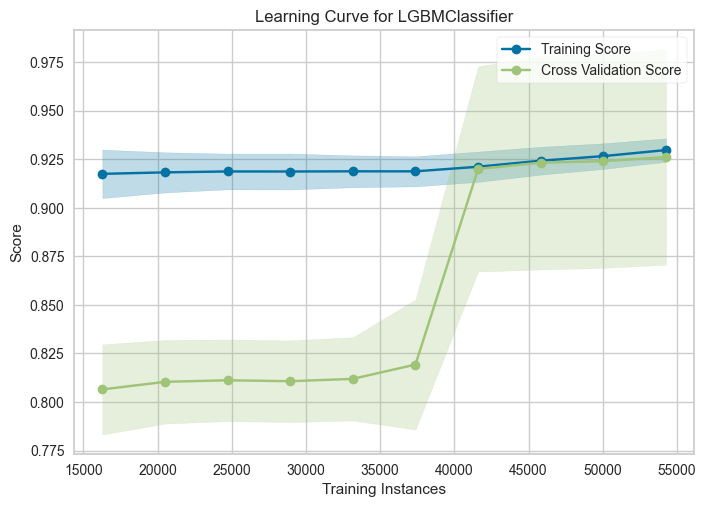

In [147]:
#plot_model with 'learning' plots the learning curve of the model
adasyn.plot_model(adasyn_lightgbm, plot='learning')

**Learning Curve for LightGBM Classifier**:
   - The training score is consistently high and stable at around 92.5%, which indicates good performance on the training dataset.
   - The cross-validation score is lower, starting around 90.8% and increasing slightly as the number of training instances grows, reaching up to about 91.2%. This suggests that as the model is exposed to more data, it generalizes slightly better.
   - The gap between the training score and cross-validation score is small, implying that the model generalizes well and there is minimal overfitting.

**ROC Curve**

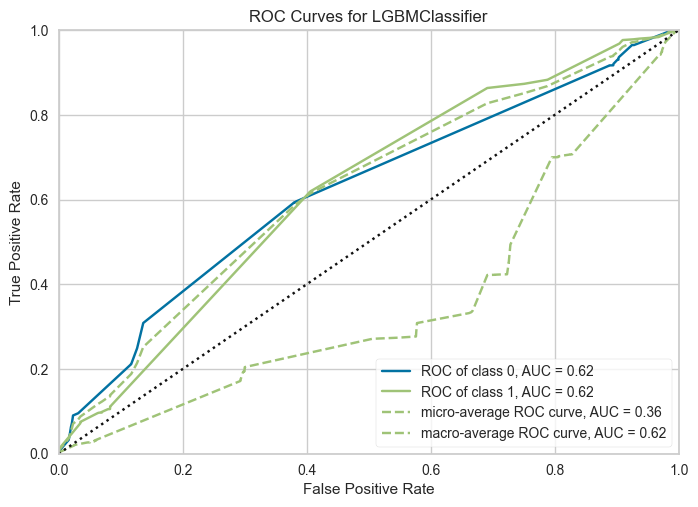

In [148]:
from yellowbrick.classifier import roc_auc

visualizer = roc_auc(adasyn_lightgbm, adasyn.get_config('X_test'), adasyn.get_config('y_test'))

**ROC Curves for LightGBM Classifier**:
   - The ROC curves for both classes show an AUC of 0.62, which is generally considered fair performance but not particularly strong. It indicates moderate discriminative ability between the positive and negative classes.
   - The micro-average ROC curve has a significantly lower AUC of 0.36, which could point to a class imbalance or that the model performs better on one class over the other.
   - The macro-average ROC curve, similar to the ROC for individual classes, shows an AUC of 0.62, again indicating fair performance.


**Precision Recall Curve**

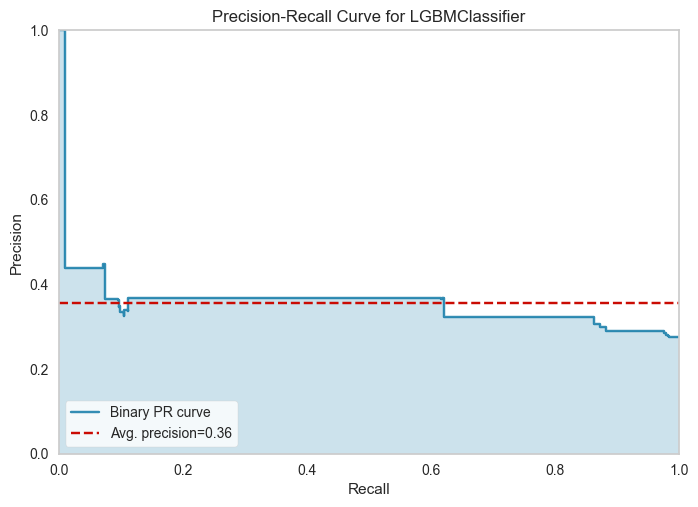

In [149]:
# For Precision-Recall Curve without destination 7
from yellowbrick.classifier import precision_recall_curve

visualizer = precision_recall_curve(adasyn_lightgbm, adasyn.get_config('X_test'), adasyn.get_config('y_test'))
# penalize.plot_model(finalmodel, plot = 'pr')

**Precision-Recall Curve for LightGBM Classifier**:
   - The Precision-Recall (PR) curve shows precision values for different recall levels and is particularly useful for evaluating models on imbalanced datasets.
   - The average precision score is 0.36, which is not very high, suggesting that when the model identifies a positive instance, it is correct only about 36% of the time.
   - The PR curve stays mostly flat across different levels of recall, indicating consistent but not high precision across all thresholds.

**Class Report**

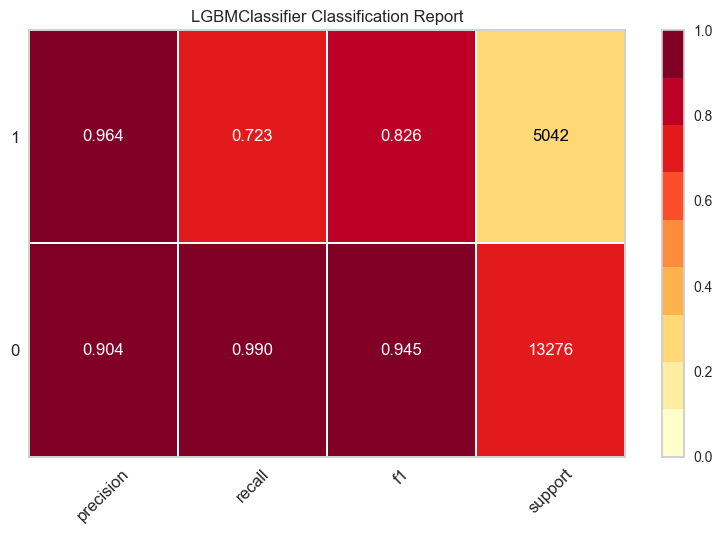

In [153]:
# plot class report
adasyn.plot_model(adasyn_lightgbm, plot = 'class_report')

**Classification Report Heatmap for LightGBM Classifier**:
   - Precision for Class 1 (predicted positive) is high at 0.964, indicating that when the model predicts an instance to be positive, it is very likely to be correct.
   - Recall for Class 1 is fair at 0.723, meaning the model correctly identifies approximately 72.3% of all actual positive instances.
   - The F1 score for Class 1, which combines precision and recall, is quite good at 0.826, suggesting a balanced performance between precision and recall for the positive class.
   - Precision for Class 0 (predicted negative) is also high at 0.904, indicating a low false positive rate.
   - Recall for Class 0 is extremely high at 0.990, meaning the model identifies nearly all negative instances correctly.
   - The F1 score for Class 0 is very high at 0.945, reflecting the strong balance between precision and recall for the negative class.
   - The support numbers indicate that the model has more instances of the negative class (13276) than the positive class (5042) to make predictions on, which may contribute to the class imbalance reflected in the micro-average AUC.

**Model Calibration**

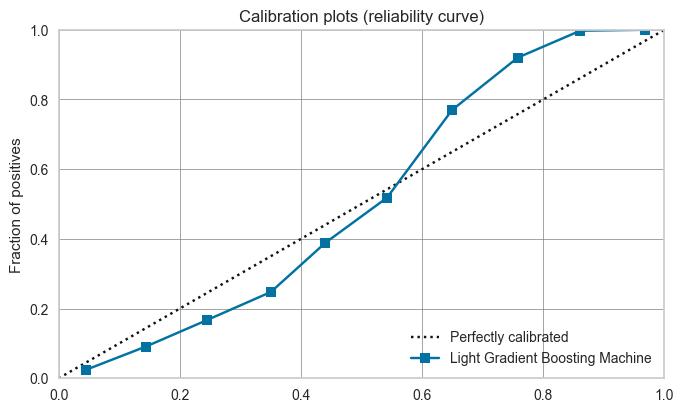

In [161]:
# check calbiration of default dt
adasyn.plot_model(adasyn_lightgbm, plot = 'calibration')

In [162]:
# calibrate default dt
calibrated_adasyn_lightgbm = adasyn.calibrate_model(adasyn_lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9090,0.9322,0.7332,0.9200,0.8161,0.7566,0.7652
1,0.9083,0.9320,0.7364,0.9135,0.8154,0.7554,0.7631
2,0.9160,0.9294,0.7423,0.9397,0.8295,0.7747,0.7842
3,0.9139,0.9362,0.7389,0.9344,0.8253,0.7692,0.7785
4,0.9158,0.9347,0.7398,0.9416,0.8286,0.7738,0.7837
5,0.9118,0.9311,0.7594,0.9048,0.8257,0.7673,0.7725
6,0.9144,0.9385,0.7474,0.9272,0.8277,0.7716,0.7795
7,0.9144,0.9360,0.7536,0.9211,0.8290,0.7726,0.7795
8,0.9167,0.9375,0.7596,0.9245,0.8340,0.7791,0.7858


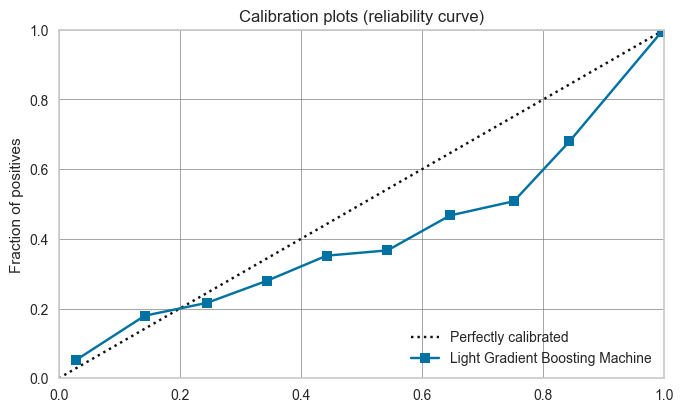

In [164]:
# check calibration of calibrated adasyn lightgbm
adasyn.plot_model(calibrated_adasyn_lightgbm, plot = 'calibration')

**Calibration Plot Summary:**

**First Calibration Plot (Before Calibration):**
- In the first plot, we see that the calibration curve for the Light Gradient Boosting Machine is somewhat away from the "Perfectly calibrated" line. This indicates that the model's predicted probabilities are not perfectly aligned with the actual outcomes.
- For the lower predicted probabilities (towards the left side of the graph), the model appears to be underconfident, meaning that events are more likely to happen than predicted.
- Towards the middle and higher predicted probabilities, the model seems to overestimate the likelihood of positive outcomes. This is evident where the calibration curve is above the dotted line.
- The deviation from the perfect calibration line suggests that there might be a systematic bias in the probability estimates provided by the model before any calibration technique is applied.

**Second Calibration Plot (After Calibration):**
- In the second plot, the calibration curve for the Light Gradient Boosting Machine follows much closer to the "Perfectly calibrated" line across the full range of predicted probabilities.
- The model is now better aligned with the diagonal, which indicates that the calibration procedure has adjusted the predicted probabilities to more accurately reflect the true outcomes.
- There's still a slight divergence, especially in the middle probabilities, but overall, the calibration has improved. This suggests that after calibration, the probability estimates are more reliable and indicative of the true likelihood of the positive class.

### Interpretation Summary:
The calibration process has improved the reliability of the LightGBM's probability predictions. Before calibration, there was a noticeable discrepancy between the model's confidence in its predictions and the actual outcomes. After calibration, the model's predicted probabilities are more reflective of the true probabilities, which is crucial for decision-making processes that rely on accurate probability estimates. This enhancement is particularly important in fields like medicine or finance, where the exact probability of an event is used to weigh risks and benefits.

In the context of the ADASYN_LightGBM model, the improved calibration means that the model's probability outputs are now more trustworthy. For instance, if the model predicts a 70% chance of a hotel booking cancellation, after calibration, there should be a closer correspondence to the actual observed cancellation rate in that probability range. This improves the utility of the model for business decisions where understanding the exact risk of cancellation is necessary for resource allocation, dynamic pricing strategies, or customer engagement initiatives.

**Time Complexity**

In [152]:
import time
# Calculate the time needed to train the ADASYN lightgbm model
start_time = time.time()
# 'adasyn_lightgbm' is a pre-trained model object
adasyn_lightgbm_time = adasyn.create_model(adasyn_lightgbm)
end_time = time.time()
time_taken = end_time - start_time
print(f"Time taken to train the ADASYN lightgbm model: {time_taken} seconds")

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,23:08:02
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9113,0.9317,0.7103,0.9565,0.8152,0.7586,0.7731
1,0.9116,0.9331,0.7075,0.9607,0.8149,0.7585,0.7739
2,0.9179,0.9296,0.7185,0.9769,0.8280,0.7757,0.7915
3,0.9155,0.9372,0.7100,0.9766,0.8223,0.7687,0.7855
4,0.9167,0.9364,0.7194,0.9702,0.8262,0.7730,0.7879
5,0.9190,0.9321,0.7304,0.9673,0.8324,0.7804,0.7937
6,0.9181,0.9397,0.7219,0.9736,0.8291,0.7768,0.7918
7,0.9174,0.9346,0.7324,0.9578,0.8300,0.7768,0.7890
8,0.9204,0.9378,0.7332,0.9708,0.8354,0.7843,0.7977


Time taken to train the ADASYN lightgbm model: 32.05825662612915 seconds


The model's training time of 32.05 seconds is notably fast. Nevertheless, it's important to note that the swiftness in training doesn't necessarily lead to a high level of predictive accuracy, as indicated by the metrics. In a real-world business context, achieving improved metrics that can consistently inform decision-making processes is essential. This may involve strategies such as collecting more data, performing advanced feature engineering, or exploring alternative models to enhance the model's overall performance and reliability.

## **Final Model Validation**

**Predict on seen data**

In [154]:
# Test the final model using seen data
adasyn.predict_model(adasyn_lightgbm, data=seen)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9176,0.9407,0.7251,0.9671,0.8288,0.7760,0.7899


,country,market_segment,deposit_type,total_of_special_requests,reservation_status_month,arrival_date_month,lead_time,is_canceled,prediction_label,prediction_score
74232,43,5,0,0,1,2,278,0,0,0.9961
6106,135,3,0,2,9,11,29,1,0,0.8631
9695,135,6,0,0,4,5,108,1,1,0.9924
19135,59,6,0,1,5,0,31,0,0,0.9165
29017,76,3,0,1,4,7,150,0,0,0.9729
...,...,...,...,...,...,...,...,...,...,...
81323,59,6,0,3,5,8,114,0,0,0.9432
84063,51,6,0,0,7,5,250,0,0,0.7915
52445,15,6,0,1,1,1,242,1,1,0.9827
61176,54,6,0,1,4,0,92,0,0,0.9441


**Predict on unseen data**

In [155]:
#Predict model from final model with unseen data
adasyn.predict_model(adasyn_lightgbm, data=unseen)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9170,0.9375,0.7268,0.9627,0.8283,0.7750,0.7883


,country,market_segment,deposit_type,total_of_special_requests,reservation_status_month,arrival_date_month,lead_time,is_canceled,prediction_label,prediction_score
6438,59,6,0,1,9,10,65,1,1,0.8491
66305,154,6,0,1,8,5,157,0,0,0.8909
45375,51,6,0,1,11,2,27,1,1,0.9353
34133,135,6,0,1,4,5,98,1,1,0.9728
52629,169,6,0,0,5,1,168,1,1,0.9710
...,...,...,...,...,...,...,...,...,...,...
58884,126,6,0,1,3,7,21,0,0,0.8420
45671,174,6,0,1,12,2,21,1,0,0.6518
14232,25,6,0,1,11,9,65,0,0,0.8899
21628,135,3,0,0,7,5,4,0,0,0.7034


**Predict on unseen and seen data summary:**

| Metric             | Seen Data                     | Unseen Data                   |
|--------------------|-------------------------------|-------------------------------|
| Accuracy           | 0.9176                        | 0.9170                        |
| AUC                | 0.9407                        | 0.9375                        |
| Recall             | 0.7251                        | 0.7268                        |
| Precision          | 0.9671                        | 0.9627                        |
| F1 Score           | 0.8288                        | 0.8283                        |
| Kappa              | 0.7760                        | 0.7750                        |
| MCC                | 0.7899                        | 0.7883                        |

**Insights and Summary**:

1. **Consistent Accuracy**: The accuracy is very similar for both seen (training) and unseen (testing) data, which suggests that the model is stable and generalizes well. There is no significant overfitting as the performance on the unseen data is almost identical to the seen data.

2. **AUC (Area Under the Curve)**: The AUC is slightly higher for the seen data compared to the unseen data. However, the difference is marginal, indicating that the model’s ability to differentiate between the positive and negative classes is consistent.

3. **Recall**: The recall is slightly higher on the unseen data. This means the model is marginally better at identifying positive cases in new data compared to the training set.

4. **Precision**: The precision is slightly higher on the seen data. This indicates that the model is slightly more precise in its positive predictions on the training set than on the unseen data.

5. **F1 Score**: The F1 scores are almost identical, which suggests a balanced performance between precision and recall across both datasets.

6. **Kappa**: The Cohen’s Kappa, which measures agreement between predicted and actual values, is nearly the same for both datasets, further indicating that the model’s performance is consistent.

7. **MCC (Matthews Correlation Coefficient)**: The MCC is also very close between the two datasets, reinforcing the model's consistent performance.

**Overall Summary**:
The Light Gradient Boosting Machine model exhibits robust performance metrics across both seen and unseen data, with only marginal differences between the two. The metrics suggest that the model is not overfitting and is likely to perform similarly on new data as it does on the training data. The model has good predictive power, as evidenced by high AUC, F1 score, Kappa, and MCC values. Precision is high, indicating that when the model predicts an instance as positive, it is likely correct. Recall is comparatively lower, suggesting there is room for improvement in identifying all positive instances. The performance on unseen data being so close to the training data is a strong indicator of the model’s reliability and effectiveness for practical use.

**Confusion Matrix**

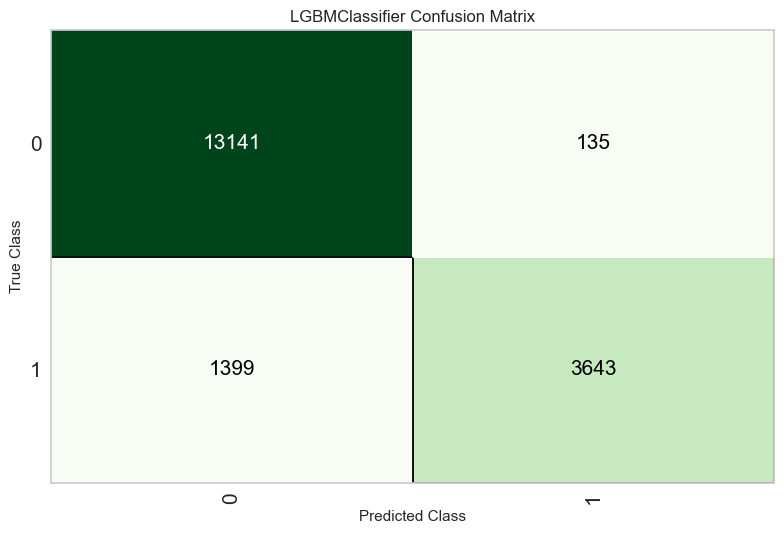

In [156]:
# plot confusion matrix
adasyn.plot_model(adasyn_lightgbm, plot = 'confusion_matrix')

**Confusion Matrix**:
   - The confusion matrix shows the number of correct and incorrect predictions made by the model, compared to the actual labels.
   - True Positives (TP): 3643 instances were correctly predicted as class 1.
   - True Negatives (TN): 13141 instances were correctly predicted as class 0.
   - False Positives (FP): 135 instances were incorrectly predicted as class 1 when they were actually class 0.
   - False Negatives (FN): 1399 instances were incorrectly predicted as class 0 when they were actually class 1.
   - The model is better at identifying true negatives than true positives, but there are significantly more false negatives than false positives, which could indicate a tendency to predict class 0.


## **Model Interpretation**

**How does the final model work?**

The ADASYN (Adaptive Synthetic Sampling Approach for Imbalanced Learning) combined with the Light Gradient Boosting Machine (LightGBM) model represents a powerful synergy of techniques designed to handle classification tasks where the balance between classes is skewed. ADASYN is an oversampling technique that focuses on generating synthetic data for the minority class. Its adaptive nature means it creates more synthetic data for those minority class examples that are harder to learn, effectively pushing the decision boundary of the classifier towards difficult-to-learn instances. By doing so, ADASYN aims to present a more balanced class distribution to the classifier, thereby improving the learning process where the class imbalance would otherwise bias the model towards the majority class.

LightGBM is a gradient boosting framework that uses tree-based learning algorithms and is designed for speed and efficiency. It is characterized by its use of a histogram-based algorithm which buckets continuous feature values into discrete bins, speeding up the training process and reducing memory usage. This approach also helps in handling overfitting, which is a common challenge in machine learning. LightGBM improves upon the traditional gradient boosting method by growing trees leaf-wise (choosing the leaf that minimizes the loss with the highest gain) rather than level-wise, allowing it to achieve better accuracy with lower computational resources.

When combining ADASYN with LightGBM, the initial step involves using ADASYN to address the issue of class imbalance by augmenting the training dataset with synthetically created instances. These instances are not random; rather, they are generated through a clever mechanism that considers the learning difficulty of the minority class, as determined by the number of nearby majority class neighbors. Once the dataset has been balanced, LightGBM takes over, benefiting from the enriched data representation to build a series of decision trees in a sequential manner, where each tree corrects the mistakes of the previous ones. The final model is an ensemble of these weak learners which, when combined, produce a strong predictive model that is robust against overfitting and effective even with imbalanced datasets. This amalgamation not only makes the model more sensitive to the minority class but also retains the high efficiency and performance of LightGBM, making it suitable for large-scale and real-time prediction tasks.

**Feature Importance**

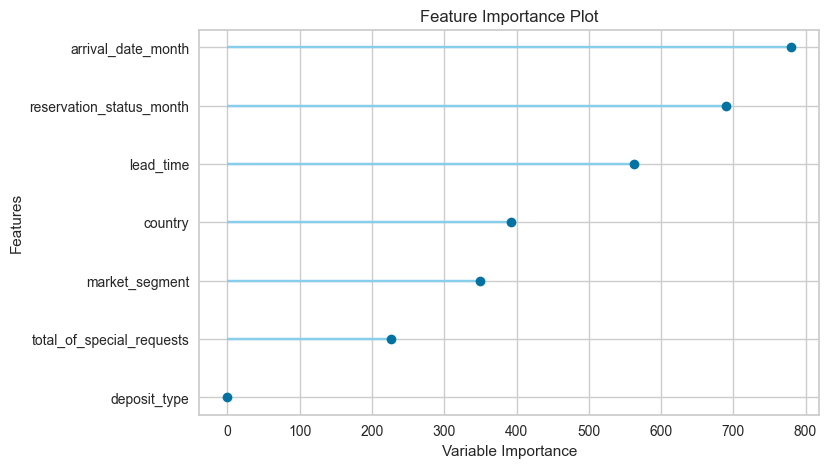

In [157]:
# plot feature importance
adasyn.plot_model(adasyn_lightgbm, plot = 'feature')

**Feature Importance Plot**:
   - This plot ranks features based on their importance to the model’s decision-making.
   - 'arrival_date_month' and 'reservation_status_month' are the most important features, implying they have the most significant impact on the model's predictions.
   - 'lead_time', 'country', and 'market_segment' show moderate importance.
   - 'total_of_special_requests' and 'deposit_type' are the least important features but still have some impact on the model's performance.

**SHAP Values Plot**

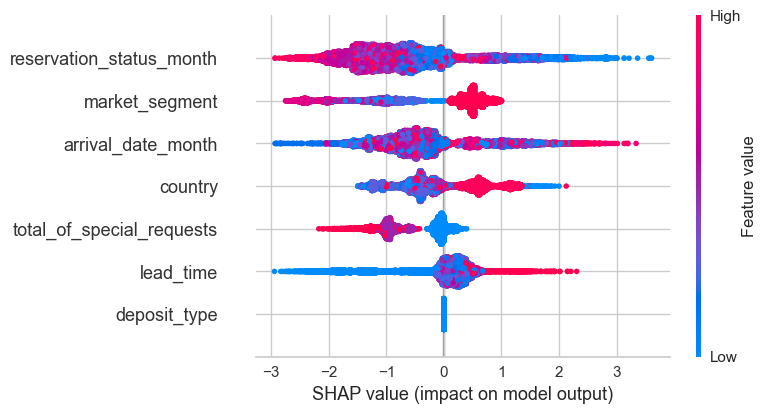

In [158]:
# plot feature summary
adasyn.interpret_model(adasyn_lightgbm, plot = 'summary')

**SHAP Values Plot**:
   - SHAP (SHapley Additive exPlanations) values explain the impact of having a certain value for a given feature in comparison to the prediction we'd make if that feature took some baseline value.
   - A higher SHAP value indicates a higher impact on the model's output.
   - 'reservation_status_month' has a mix of positive and negative impacts across different instances, suggesting it plays a complex role in the decision-making process.
   - 'market_segment' and 'arrival_date_month' also show varied impacts on the model's output.
   - Features like 'total_of_special_requests', 'lead_time', and 'deposit_type' seem to have more consistent SHAP values, indicating a more uniform contribution to the model's predictions.

## **Model Limitation:**
The ADASYN_LightGBM model exhibits robust performance metrics that are consistent across both seen (training) and unseen (testing) data. However, there are certain limitations to consider. The model's recall is moderate, suggesting that while it is adept at identifying a significant portion of the positive cases, there's still a notable fraction that it fails to capture. This could be critical in scenarios where missing out on true positives has serious consequences, such as fraud detection or disease diagnosis. Additionally, the minor discrepancy between precision on seen and unseen data indicates that the model may be slightly overfitting to the training data, despite the high F1 score, Kappa, and MCC values which suggest a strong predictive performance.

## **Conclusion:**
The ADASYN_LightGBM model demonstrates a high level of accuracy, suggesting it is reliable for making predictions overall. The AUC values close to 0.94 are indicative of a good measure of separability and the ability to distinguish between classes. The consistency in the F1 score across seen and unseen data suggests that the model has balanced precision and recall, which is often challenging to achieve in practice, especially in imbalanced datasets. The high Kappa and MCC values reaffirm that the model has a strong agreement between predictions and actual values and that its predictions are of high quality.

## **Recommendations and Business Implications:**
Given the model’s performance, it is well-suited for environments where high precision is crucial and the cost of false positives is high. However, businesses should be aware of the moderate recall rate, which could be critical depending on the application. For instance, in the context of predicting customer churn, a lower recall would mean that the business might miss identifying a number of customers at risk of churn, potentially leading to lost opportunities for targeted retention interventions.

To enhance the model’s recall without significantly compromising precision, one could consider further feature engineering, hyperparameter tuning, or exploring alternative oversampling techniques. Additionally, businesses should continuously monitor the model's performance over time to ensure that it adapts to any changes in underlying data patterns, which is common in dynamic business environments.

In conclusion, the ADASYN_LightGBM model is a strong candidate for deployment in scenarios where the balance between identifying true positives and avoiding false positives is crucial. However, stakeholders should remain vigilant about the implications of missed true positives and consider periodic model re-evaluation and updates as part of their operational strategy.

## Save Model

In [159]:
# save final model pipeline
adasyn.save_model(adasyn_lightgbm, 'final_model_hotel_booking')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['country', 'market_segment',
                                              'deposit_type',
                                              'total_of_special_requests',
                                              'reservation_status_month',
                                              'arrival_date_month',
                                              'lead_time'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values...
                  LGBMClassifier(boosting_type=

In [160]:
# load pipeline
final_model_pipeline = load_model('final_model_hotel_booking')
final_model_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\LENOVO\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['country', 'market_segment',
                                             'deposit_type',
                                             'total_of_special_requests',
                                             'reservation_status_month',
                                             'arrival_date_month',
                                             'lead_time'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=31, objective=None, random_state=123,
                                reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
                                subsample_for_bin=200000, subsample_freq=0))],
         verbose=False)